In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [10]:
import lxml
import selenium
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme()

In [5]:
import pandas as pd
import numpy as np
import requests

races = {'season': [],
        'round': [],
        'circuit_id': [],
        'lat': [],
        'long': [],
        'country': [],
        'date': [],
        'url': []}

for year in list(range(1990,2021)):
    
    url = 'https://ergast.com/api/f1/{}.json'
    r = requests.get(url.format(year))
    json = r.json()

    for item in json['MRData']['RaceTable']['Races']:
        try:
            races['season'].append(int(item['season']))
        except:
            races['season'].append(None)

        try:
            races['round'].append(int(item['round']))
        except:
            races['round'].append(None)

        try:
            races['circuit_id'].append(item['Circuit']['circuitId'])
        except:
            races['circuit_id'].append(None)

        try:
            races['lat'].append(float(item['Circuit']['Location']['lat']))
        except:
            races['lat'].append(None)

        try:
            races['long'].append(float(item['Circuit']['Location']['long']))
        except:
            races['long'].append(None)

        try:
            races['country'].append(item['Circuit']['Location']['country'])
        except:
            races['country'].append(None)

        try:
            races['date'].append(item['date'])
        except:
            races['date'].append(None)

        try:
            races['url'].append(item['url'])
        except:
            races['url'].append(None)
        
race= pd.DataFrame(races)

In [9]:
race

,season,round,circuit_id,lat,long,country,date,url
0,1990,1,phoenix,33.4479,-112.07500,USA,1990-03-11,http://en.wikipedia.org/wiki/1990_United_State...
1,1990,2,interlagos,-23.7036,-46.69970,Brazil,1990-03-25,http://en.wikipedia.org/wiki/1990_Brazilian_Gr...
2,1990,3,imola,44.3439,11.71670,Italy,1990-05-13,http://en.wikipedia.org/wiki/1990_San_Marino_G...
3,1990,4,monaco,43.7347,7.42056,Monaco,1990-05-27,http://en.wikipedia.org/wiki/1990_Monaco_Grand...
4,1990,5,villeneuve,45.5000,-73.52280,Canada,1990-06-10,http://en.wikipedia.org/wiki/1990_Canadian_Gra...
...,...,...,...,...,...,...,...,...
546,2020,13,imola,44.3439,11.71670,Italy,2020-11-01,https://en.wikipedia.org/wiki/2020_Emilia_Roma...
547,2020,14,istanbul,40.9517,29.40500,Turkey,2020-11-15,https://en.wikipedia.org/wiki/2020_Turkish_Gra...
548,2020,15,bahrain,26.0325,50.51060,Bahrain,2020-11-29,https://en.wikipedia.org/wiki/2020_Bahrain_Gra...
549,2020,16,bahrain,26.0325,50.51060,Bahrain,2020-12-06,https://en.wikipedia.org/wiki/2020_Sakhir_Gran...


In [10]:
race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      551 non-null    int64  
 1   round       551 non-null    int64  
 2   circuit_id  551 non-null    object 
 3   lat         551 non-null    float64
 4   long        551 non-null    float64
 5   country     551 non-null    object 
 6   date        551 non-null    object 
 7   url         551 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 34.6+ KB


<AxesSubplot:ylabel='Frequency'>

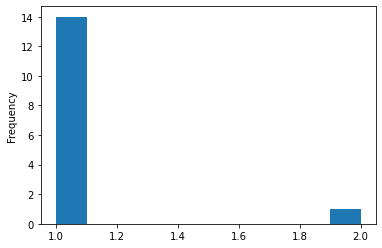

In [14]:
race[race["season"]==1992].groupby("country")["round"].count().plot(kind="hist")

In [6]:
rounds = []
for year in np.array(race.season.unique()):
    rounds.append([year, list(race[race.season == year]['round'])])

# query API
    
results = {'season': [],
          'round':[],
           'circuit_id':[],
          'driver': [],
           'date_of_birth': [],
           'nationality': [],
          'constructor': [],
          'grid': [],
          'time': [],
          'status': [],
          'points': [],
          'podium': []}

for n in list(range(len(rounds))):
    for i in rounds[n][1]:
    
        url = 'http://ergast.com/api/f1/{}/{}/results.json'
        r = requests.get(url.format(rounds[n][0], i))
        json = r.json()

        for item in json['MRData']['RaceTable']['Races'][0]['Results']:
            try:
                results['season'].append(int(json['MRData']['RaceTable']['Races'][0]['season']))
            except:
                results['season'].append(None)

            try:
                results['round'].append(int(json['MRData']['RaceTable']['Races'][0]['round']))
            except:
                results['round'].append(None)

            try:
                results['circuit_id'].append(json['MRData']['RaceTable']['Races'][0]['Circuit']['circuitId'])
            except:
                results['circuit_id'].append(None)

            try:
                results['driver'].append(item['Driver']['driverId'])
            except:
                results['driver'].append(None)
            
            try:
                results['date_of_birth'].append(item['Driver']['dateOfBirth'])
            except:
                results['date_of_birth'].append(None)
                
            try:
                results['nationality'].append(item['Driver']['nationality'])
            except:
                results['nationality'].append(None)

            try:
                results['constructor'].append(item['Constructor']['constructorId'])
            except:
                results['constructor'].append(None)

            try:
                results['grid'].append(int(item['grid']))
            except:
                results['grid'].append(None)

            try:
                results['time'].append(int(item['Time']['millis']))
            except:
                results['time'].append(None)

            try:
                results['status'].append(item['status'])
            except:
                results['status'].append(None)

            try:
                results['points'].append(int(item['points']))
            except:
                results['points'].append(None)

            try:
                results['podium'].append(int(item['position']))
            except:
                results['podium'].append(None)

           
results = pd.DataFrame(results)

In [7]:
results

,season,round,circuit_id,driver,date_of_birth,nationality,constructor,grid,time,status,points,podium
0,1990,1,phoenix,senna,1960-03-21,Brazilian,mclaren,5,6752829.0,Finished,9.0,1
1,1990,1,phoenix,alesi,1964-06-11,French,tyrrell,4,6761514.0,Finished,6.0,2
2,1990,1,phoenix,boutsen,1957-07-13,Belgian,williams,9,6806909.0,Finished,4.0,3
3,1990,1,phoenix,piquet,1952-08-17,Brazilian,benetton,6,6821187.0,Finished,3.0,4
4,1990,1,phoenix,modena,1963-05-12,Italian,brabham,10,6822332.0,Finished,2.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
12392,2020,17,yas_marina,giovinazzi,1993-12-14,Italian,alfa,14,NaN,+1 Lap,0.0,16
12393,2020,17,yas_marina,latifi,1995-06-29,Canadian,williams,18,NaN,+1 Lap,0.0,17
12394,2020,17,yas_marina,kevin_magnussen,1992-10-05,Danish,haas,20,NaN,+1 Lap,0.0,18
12395,2020,17,yas_marina,pietro_fittipaldi,1996-06-25,Brazilian,haas,17,NaN,+2 Laps,0.0,19


# Analyse du dataframe "results"

In [8]:
results.info() # A priori des valeurs manquantes sur les temps 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12397 entries, 0 to 12396
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         12397 non-null  int64  
 1   round          12397 non-null  int64  
 2   circuit_id     12397 non-null  object 
 3   driver         12397 non-null  object 
 4   date_of_birth  12397 non-null  object 
 5   nationality    12397 non-null  object 
 6   constructor    12397 non-null  object 
 7   grid           12397 non-null  int64  
 8   time           4464 non-null   float64
 9   status         12397 non-null  object 
 10  points         12392 non-null  float64
 11  podium         12397 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.1+ MB


0.639912882148907

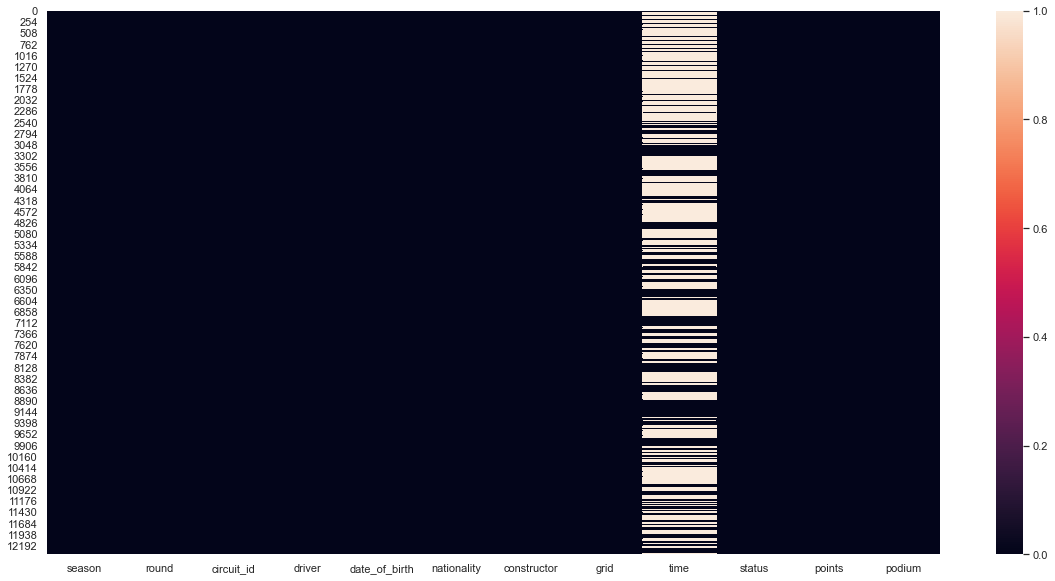

In [13]:
results_na=results.copy()
sns.heatmap(results_na.isna()) # On visualise l'emplacements des valeurs manquantes On a bcp de valeurs manquantes et un peu partout
results_na.isna()['time'].mean() # 64% de valeurs manquantes on ne va donc pas utiliser cette metrics autant la supprimer 


In [15]:
results=results.drop(labels='time', axis=1) #on supprime la colonne time 

## étudions le lien entre grid et podium 

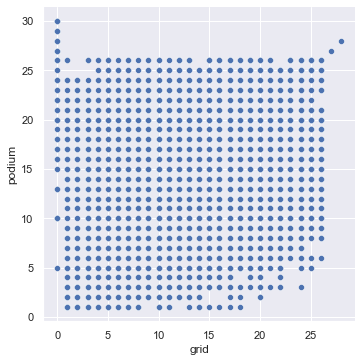

In [16]:


sns.relplot(x="grid", y="podium", data=results) #On obtient qqc qui paraît totalement random ce qui n'est pas trop logique a priori 



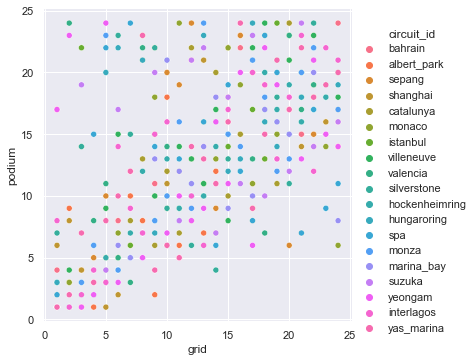

In [42]:
results_2010=results.copy()
results_2010=results_2010[results_2010["season"]>=2010]
sns.relplot(x="grid", y="podium", data=results_2010[results_2010["season"]==2010],hue="circuit_id") # étude lien pôle postion et podium par circuit en 2010
# Ce n'est encore une fois pas très lisible 

        circuit_id  correlation_grid_pod
0          bahrain              0.914783
10  hockenheimring              0.903478
7       villeneuve              0.852174
3         shanghai              0.785217
17      interlagos              0.771304
4        catalunya              0.762609
6         istanbul              0.758261
18      yas_marina              0.746957
13           monza              0.701739
14      marina_bay              0.621739
1      albert_park              0.579130
9      silverstone              0.551304
5           monaco              0.532174
8         valencia              0.528696
11     hungaroring              0.487826
15          suzuka              0.485217
2           sepang              0.346957
16         yeongam              0.312174
12             spa              0.273913


<AxesSubplot:xlabel='circuit_id', ylabel='correlation_grid_pod'>

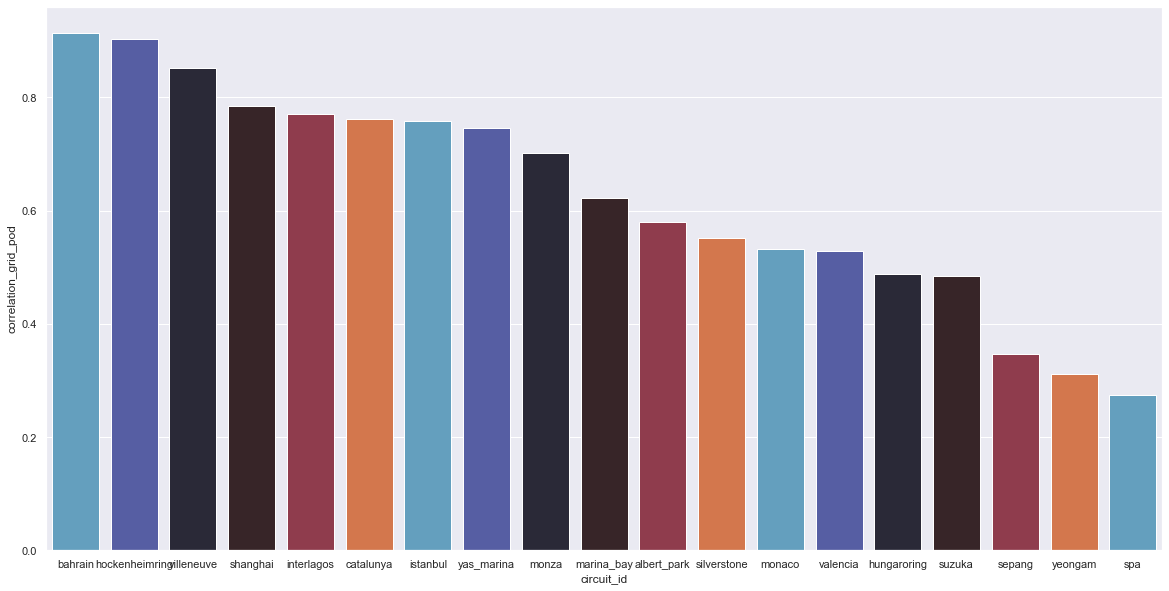

In [41]:
# je trace la correlation entre grid et podium par circuit en 2010. On remarque que cela dépend vraiment des circuits
circuits=results_2010[results_2010["season"] ==2010]["circuit_id"].unique()
df=results_2010[results_2010["season"] ==2010]
les_correlations={}

for circuit in circuits:
    df1=df[df["circuit_id"]==circuit][['grid',"podium"]]
    corr=df1.corr()["podium"][0]
    les_correlations[circuit]=corr
    
df2=pd.DataFrame(list(les_correlations.items()),
                   columns=['circuit_id', 'correlation_grid_pod'])
df2=df2.sort_values(by='correlation_grid_pod',ascending=False)

print(df2)

_,(ax1) = plt.subplots(ncols=1)
sns.barplot(data=df2, x='circuit_id', y='correlation_grid_pod', ax=ax1, palette=sns.color_palette("icefire"))
    
# Les correlations dépendent fortement du type de circuit 
    
    

                    

## Étude lien constructeur et classement et victoire 

In [54]:
results_constructeur=results.copy()
results_constructeur=results_constructeur[["constructor","podium","grid"]]


In [55]:
#constructeur qui fait les meilleurs résulats en moyenne 
results_constructeur.groupby("constructor").mean().sort_values(by="podium",ascending=True)

,podium,grid
constructor,,
brawn,4.882353,5.117647
mercedes,5.769767,4.611628
ferrari,7.433757,5.715971
red_bull,7.996711,6.980263
bmw_sauber,8.921429,8.935714
mclaren,9.269510,7.372051
benetton,9.543367,8.571429
renault,10.467626,9.989209
racing_point,10.631579,11.315789


<AxesSubplot:xlabel='constructor', ylabel='podium'>

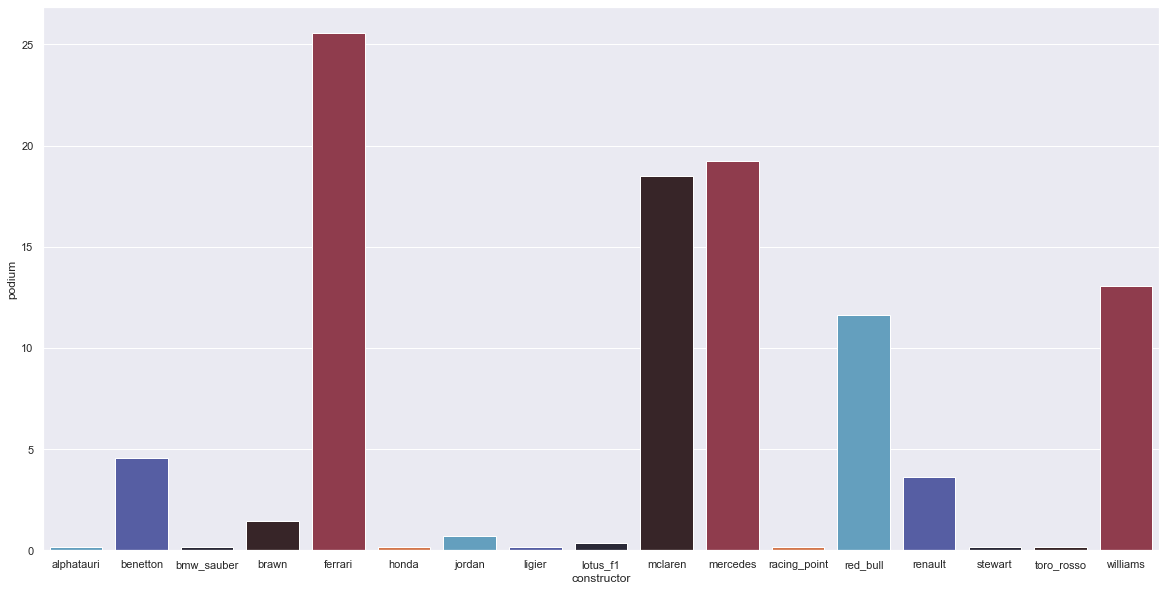

In [67]:
# On trace le pourcentage de course gagné par constructeur. Clairement certains constructeurs sortent du lot
results_constructeur_1=results_constructeur.copy()
results_constructeur_1=results_constructeur_1[results_constructeur_1["podium"]==1]
df=(results_constructeur_1.groupby("constructor").count())/len(results_constructeur_1)*100
df=df.reset_index()
_,(ax1) = plt.subplots(ncols=1)
sns.barplot(data=df, x='constructor', y='podium', ax=ax1, palette=sns.color_palette("icefire"))

## Étude du lien entre nationalité et victoire 

In [88]:
results_nationality=results.copy()
results_nationality=results_nationality[["nationality","grid","podium","circuit_id"]]

<AxesSubplot:xlabel='nationality', ylabel='podium'>

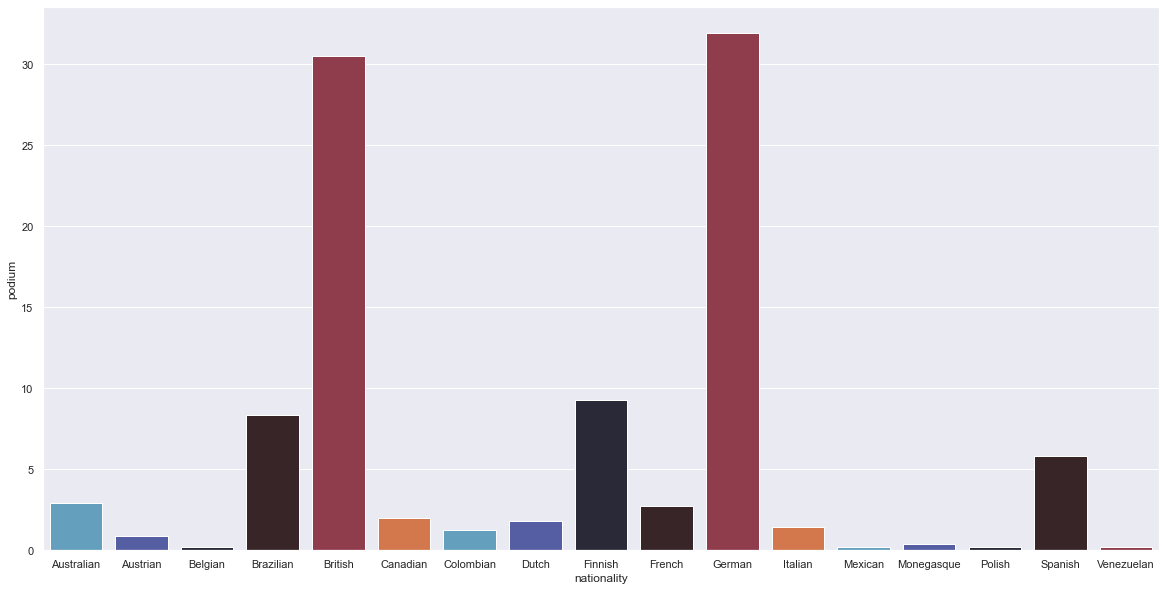

In [102]:
# Pourcentage de victoire par nationalité depuis 1990
nb_courses=len(results_nationality[results_nationality["podium"]==1])
df=((results_nationality[results_nationality["podium"]==1].groupby("nationality").count())/(nb_courses))*100
df=df.reset_index()
sns.barplot(x='nationality',y='podium',data=df,palette=sns.color_palette("icefire"))

<AxesSubplot:xlabel='nationality', ylabel='Count'>

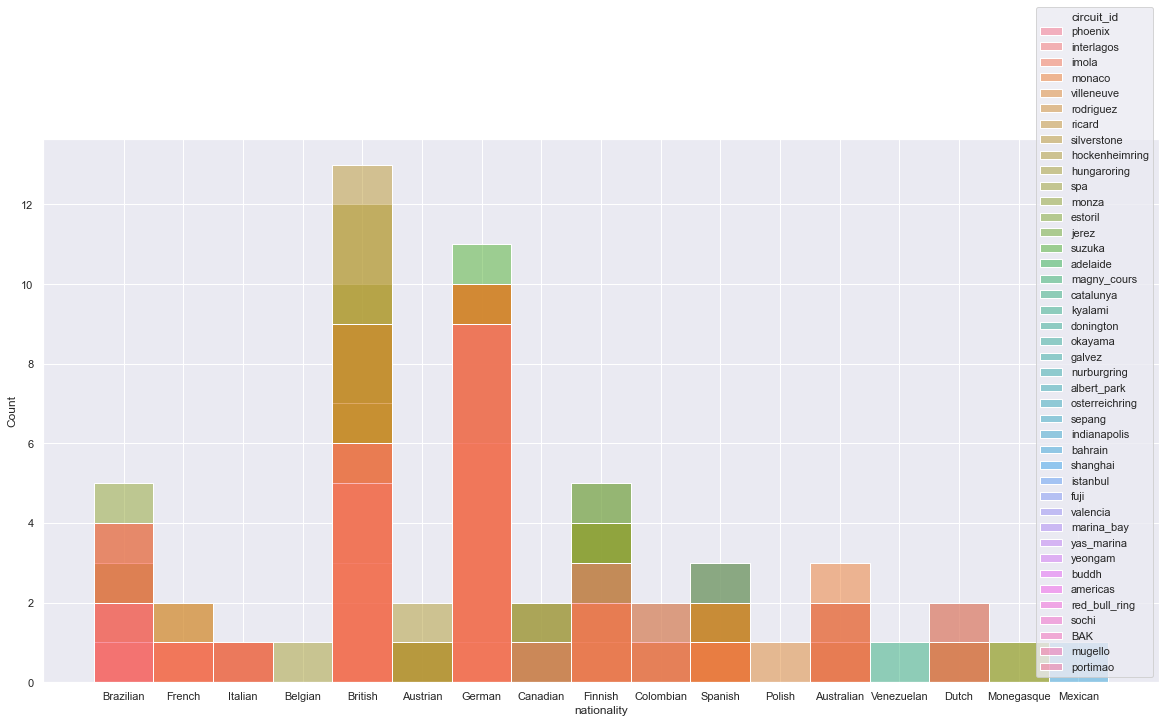

In [101]:
#Hyper bizarre quand je trace par circuit_id je trouve pas du tt la même chose que tout à l'heure 
df1=results_nationality[results_nationality["podium"]==1]
df1
sns.histplot(data=df1, x='nationality', hue="circuit_id")

## Étude du lien entre âge et victoire 

In [103]:
results

,season,round,circuit_id,driver,date_of_birth,nationality,constructor,grid,status,points,podium
0,1990,1,phoenix,senna,1960-03-21,Brazilian,mclaren,5,Finished,9.0,1
1,1990,1,phoenix,alesi,1964-06-11,French,tyrrell,4,Finished,6.0,2
2,1990,1,phoenix,boutsen,1957-07-13,Belgian,williams,9,Finished,4.0,3
3,1990,1,phoenix,piquet,1952-08-17,Brazilian,benetton,6,Finished,3.0,4
4,1990,1,phoenix,modena,1963-05-12,Italian,brabham,10,Finished,2.0,5
...,...,...,...,...,...,...,...,...,...,...,...
12392,2020,17,yas_marina,giovinazzi,1993-12-14,Italian,alfa,14,+1 Lap,0.0,16
12393,2020,17,yas_marina,latifi,1995-06-29,Canadian,williams,18,+1 Lap,0.0,17
12394,2020,17,yas_marina,kevin_magnussen,1992-10-05,Danish,haas,20,+1 Lap,0.0,18
12395,2020,17,yas_marina,pietro_fittipaldi,1996-06-25,Brazilian,haas,17,+2 Laps,0.0,19


<AxesSubplot:>

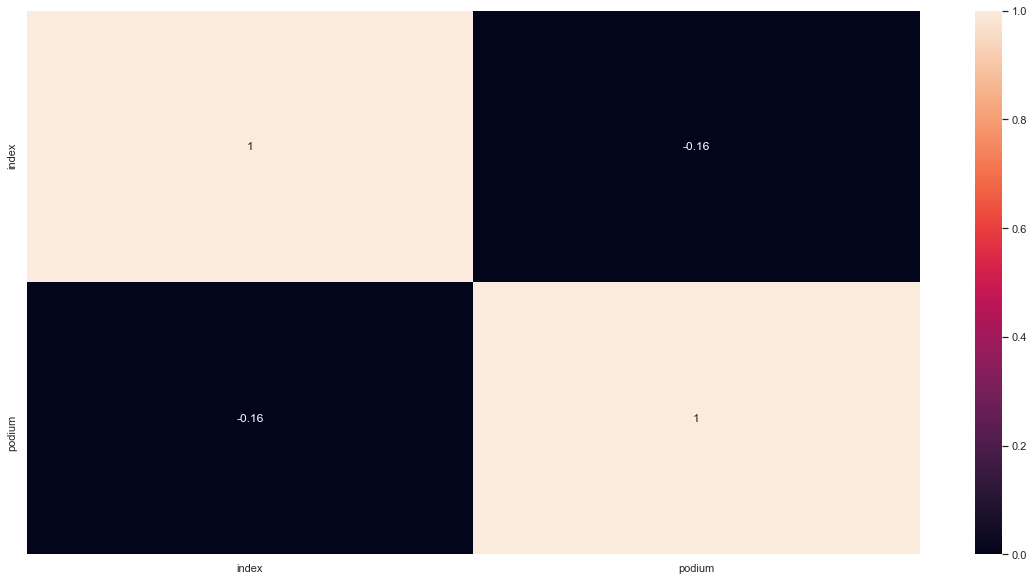

In [173]:
results_age=results.copy()
#df['date amm annee'] = pd.to_datetime(df['date amm annee'],format='%Y%m%d'
results_age["date_of_birth"]=pd.to_datetime(results_age["date_of_birth"])
results_age["season"]=pd.to_datetime(results_age["season"], format="%Y")
results_age["age"]=(results_age["season"]-results_age['date_of_birth'])# j'arrive pas à convertir en année 
df=results_age[["age","podium"]].reset_index()
corr = df.corr()
sns.heatmap(corr,annot=True,vmin=0, vmax=1) # légère corrélation négative avec l'âge, ce n'est pas très significatif 



In [162]:
a=2020
a=str(a)
age=pd.to_datetime(a,format="%Y")
age

Timestamp('2020-01-01 00:00:00')

In [5]:
driver_standings = {'season': [],
                    'round':[],
                    'driver': [],
                    'driver_points': [],
                    'driver_wins': [],
                   'driver_standings_pos': []}

# query API

for n in list(range(len(rounds))):     
    for i in rounds[n][1]:    # iterate through rounds of each year
    
        url = 'https://ergast.com/api/f1/{}/{}/driverStandings.json'
        r = requests.get(url.format(rounds[n][0], i))
        json = r.json()

        for item in json['MRData']['StandingsTable']['StandingsLists'][0]['DriverStandings']:
            try:
                driver_standings['season'].append(int(json['MRData']['StandingsTable']['StandingsLists'][0]['season']))
            except:
                driver_standings['season'].append(None)

            try:
                driver_standings['round'].append(int(json['MRData']['StandingsTable']['StandingsLists'][0]['round']))
            except:
                driver_standings['round'].append(None)
                                         
            try:
                driver_standings['driver'].append(item['Driver']['driverId'])
            except:
                driver_standings['driver'].append(None)
            
            try:
                driver_standings['driver_points'].append(int(item['points']))
            except:
                driver_standings['driver_points'].append(None)
            
            try:
                driver_standings['driver_wins'].append(int(item['wins']))
            except:
                driver_standings['driver_wins'].append(None)
                
            try:
                driver_standings['driver_standings_pos'].append(int(item['position']))
            except:
                driver_standings['driver_standings_pos'].append(None)
            
driver_standings = pd.DataFrame(driver_standings)

# define lookup function to shift points and number of wins from previous rounds

def lookup (df, team, points):
    df['lookup1'] = df.season.astype(str) + df[team] + df['round'].astype(str)
    df['lookup2'] = df.season.astype(str) + df[team] + (df['round']-1).astype(str)
    new_df = df.merge(df[['lookup1', points]], how = 'left', left_on='lookup2',right_on='lookup1')
    new_df.drop(['lookup1_x', 'lookup2', 'lookup1_y'], axis = 1, inplace = True)
    new_df.rename(columns = {points+'_x': points+'_after_race', points+'_y': points}, inplace = True)
    new_df[points].fillna(0, inplace = True)
    return new_df
  
driver_standings = lookup(driver_standings, 'driver', 'driver_points')
driver_standings = lookup(driver_standings, 'driver', 'driver_wins')
driver_standings = lookup(driver_standings, 'driver', 'driver_standings_pos')

driver_standings.drop(['driver_points_after_race', 'driver_wins_after_race', 'driver_standings_pos_after_race'], 
                      axis = 1, inplace = True)

In [6]:
driver_standings

,season,round,driver,driver_points,driver_wins,driver_standings_pos
0,1990,1,senna,0.0,0.0,0.0
1,1990,1,alesi,0.0,0.0,0.0
2,1990,1,boutsen,0.0,0.0,0.0
3,1990,1,piquet,0.0,0.0,0.0
4,1990,1,modena,0.0,0.0,0.0
...,...,...,...,...,...,...
12688,2020,17,grosjean,2.0,0.0,19.0
12689,2020,17,kevin_magnussen,1.0,0.0,20.0
12690,2020,17,latifi,0.0,0.0,21.0
12691,2020,17,aitken,0.0,0.0,22.0


In [7]:
# start from year 1990

constructor_rounds = rounds

constructor_standings = {'season': [],
                    'round':[],
                    'constructor': [],
                    'constructor_points': [],
                    'constructor_wins': [],
                   'constructor_standings_pos': []}
# query API

for n in list(range(len(constructor_rounds))):
    for i in constructor_rounds[n][1]:
    
        url = 'https://ergast.com/api/f1/{}/{}/constructorStandings.json'
        r = requests.get(url.format(constructor_rounds[n][0], i))
        json = r.json()

        for item in json['MRData']['StandingsTable']['StandingsLists'][0]['ConstructorStandings']:
            try:
                constructor_standings['season'].append(int(json['MRData']['StandingsTable']['StandingsLists'][0]['season']))
            except:
                constructor_standings['season'].append(None)

            try:
                constructor_standings['round'].append(int(json['MRData']['StandingsTable']['StandingsLists'][0]['round']))
            except:
                constructor_standings['round'].append(None)
                                         
            try:
                constructor_standings['constructor'].append(item['Constructor']['constructorId'])
            except:
                constructor_standings['constructor'].append(None)
            
            try:
                constructor_standings['constructor_points'].append(int(item['points']))
            except:
                constructor_standings['constructor_points'].append(None)
            
            try:
                constructor_standings['constructor_wins'].append(int(item['wins']))
            except:
                constructor_standings['constructor_wins'].append(None)
                
            try:
                constructor_standings['constructor_standings_pos'].append(int(item['position']))
            except:
                constructor_standings['constructor_standings_pos'].append(None)
            
constructor_standings = pd.DataFrame(constructor_standings)

constructor_standings = lookup(constructor_standings, 'constructor', 'constructor_points')
constructor_standings = lookup(constructor_standings, 'constructor', 'constructor_wins')
constructor_standings = lookup(constructor_standings, 'constructor', 'constructor_standings_pos')

constructor_standings.drop(['constructor_points_after_race', 'constructor_wins_after_race','constructor_standings_pos_after_race' ],
                           axis = 1, inplace = True)

In [8]:
constructor_standings

,season,round,constructor,constructor_points,constructor_wins,constructor_standings_pos
0,1990,1,mclaren,0.0,0.0,0.0
1,1990,1,tyrrell,0.0,0.0,0.0
2,1990,1,williams,0.0,0.0,0.0
3,1990,1,benetton,0.0,0.0,0.0
4,1990,1,brabham,0.0,0.0,0.0
...,...,...,...,...,...,...
6302,2020,17,ferrari,131.0,0.0,6.0
6303,2020,17,alphatauri,103.0,1.0,7.0
6304,2020,17,alfa,8.0,0.0,8.0
6305,2020,17,haas,3.0,0.0,9.0


In [10]:
import bs4
from bs4 import BeautifulSoup

qualifying_results = pd.DataFrame()

for year in list(range(1990,2021)):
    url = 'https://www.formula1.com/en/results.html/{}/races.html'
    r = requests.get(url.format(year))
    soup = BeautifulSoup(r.text, 'html.parser')
    
    # find links to all circuits for a certain year
    
    year_links = []
    for page in soup.find_all('a', attrs = {'class':"resultsarchive-filter-item-link FilterTrigger"}):
        link = page.get('href')
        if f'/en/results.html/{year}/races/' in link: 
            year_links.append(link)
    
    # for each circuit, switch to the starting grid page and read table

    year_df = pd.DataFrame()
    new_url = 'https://www.formula1.com{}'
    for n, link in list(enumerate(year_links)):
        link = link.replace('race-result.html', 'starting-grid.html')
        df = pd.read_html(new_url.format(link))
        df = df[0]
        df['season'] = year
        df['round'] = n+1
        for col in df:
            if 'Unnamed' in col:
                df.drop(col, axis = 1, inplace = True)

        year_df = pd.concat([year_df, df])

    # concatenate all tables from all years  
        
    qualifying_results = pd.concat([qualifying_results, year_df])

# rename columns
    
qualifying_results.rename(columns = {'Pos': 'grid', 'Driver': 'driver_name', 'Car': 'car',
                                     'Time': 'qualifying_time'}, inplace = True)
# drop driver number column

qualifying_results.drop('No', axis = 1, inplace = True)

In [12]:
qualifying_results

,grid,driver_name,car,qualifying_time,season,round
0,1,Gerhard Berger BER,McLaren Honda,1:28.664,1990,1
1,2,Pierluigi Martini MAR,Minardi Ford,1:28.731,1990,1
2,3,Andrea de Cesaris DEC,Dallara Ford,1:29.019,1990,1
3,4,Jean Alesi ALE,Tyrrell Ford,1:29.408,1990,1
4,5,Ayrton Senna SEN,McLaren Honda,1:29.431,1990,1
...,...,...,...,...,...,...
15,16,George Russell RUS,Williams Mercedes,1:38.045,2020,17
16,17,Pietro Fittipaldi FIT,Haas Ferrari,1:38.173,2020,17
17,18,Nicholas Latifi LAT,Williams Mercedes,1:38.443,2020,17
18,19,Sergio Perez PER,Racing Point BWT Mercedes,NaN,2020,17


In [18]:
from selenium import webdriver

weather = race.iloc[:,[0,1,2]]

info = []

# read wikipedia tables

for link in race.url:
    try:
        df = pd.read_html(link)[0]
        if 'Weather' in list(df.iloc[:,0]):
            n = list(df.iloc[:,0]).index('Weather')
            info.append(df.iloc[n,1])
        else:
            df = pd.read_html(link)[1]
            if 'Weather' in list(df.iloc[:,0]):
                n = list(df.iloc[:,0]).index('Weather')
                info.append(df.iloc[n,1])
            else:
                df = pd.read_html(link)[2]
                if 'Weather' in list(df.iloc[:,0]):
                    n = list(df.iloc[:,0]).index('Weather')
                    info.append(df.iloc[n,1])
                else:
                    df = pd.read_html(link)[3]
                    if 'Weather' in list(df.iloc[:,0]):
                        n = list(df.iloc[:,0]).index('Weather')
                        info.append(df.iloc[n,1])
                    else:
                        driver = webdriver.Chrome()
                        driver.get(link)

                        # click language button
                        button = driver.find_element_by_link_text('Italiano')
                        button.click()
                        
                        # find weather in italian with selenium
                        
                        clima = driver.find_element_by_xpath('//*[@id="mw-content-text"]/div/table[1]/tbody/tr[9]/td').text
                        info.append(clima) 
                                
    except:
        info.append('not found')

# append column with weather information to dataframe  
  
weather['weather'] = info

# set up a dictionary to convert weather information into keywords

weather_dict = {'weather_warm': ['soleggiato', 'clear', 'warm', 'hot', 'sunny', 'fine', 'mild', 'sereno'],
               'weather_cold': ['cold', 'fresh', 'chilly', 'cool'],
               'weather_dry': ['dry', 'asciutto'],
               'weather_wet': ['showers', 'wet', 'rain', 'pioggia', 'damp', 'thunderstorms', 'rainy'],
               'weather_cloudy': ['overcast', 'nuvoloso', 'clouds', 'cloudy', 'grey', 'coperto']}

# map new df according to weather dictionary

weather_df = pd.DataFrame(columns = weather_dict.keys())
for col in weather_df:
    weather_df[col] = weather['weather'].map(lambda x: 1 if any(i in weather_dict[col] for i in x.lower().split()) else 0)
   
weather_info = pd.concat([weather, weather_df], axis = 1)

/tmp/ipykernel_299/4215313175.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['weather'] = info
